<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_Bartlett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import scipy

In [3]:
def treat_values(values):
    values = [round(x, ndigits=1) for x in values]
    values = np.array(values)
    return values

In [4]:
# p = k-1 (grau de liberdade)

def bartlett_critico(p):
  if p <= 20:
    X2c = [0, 3.841, 5.991, 7.815, 9.488, 11.071, 12.592, 14.067, 15.507, 16.919, 18.307,
          19.675, 21.026, 22.362, 23.685, 24.996, 26.296, 27.587, 28.869, 30.144, 31.410]
    b_critico = X2c[p]
  else:
    pass

  return b_critico

In [5]:
# k = número de amostras
# n = quantidade de valores na amostra

def criaTabelaNormal(k, n):
  tabela = pd.DataFrame(columns=[f"col_{i}" for i in range(1, k+1)])

  for i in range(1, k+1):
    tabela[f'col_{i}'] = treat_values(np.random.normal(loc=200, scale=50, size=n))

  return tabela

In [6]:
# k = número de amostras
# n = quantidade de valores na amostra

def criaTabela(k, n):
  tabela = pd.DataFrame(columns=[f"col_{i}" for i in range(1, k+1)])

  for i in range(1, k+1):
    population = tuple(range(1, i*1000))
    tabela[f'col_{i}'] = random.sample(population, n)

  return tabela

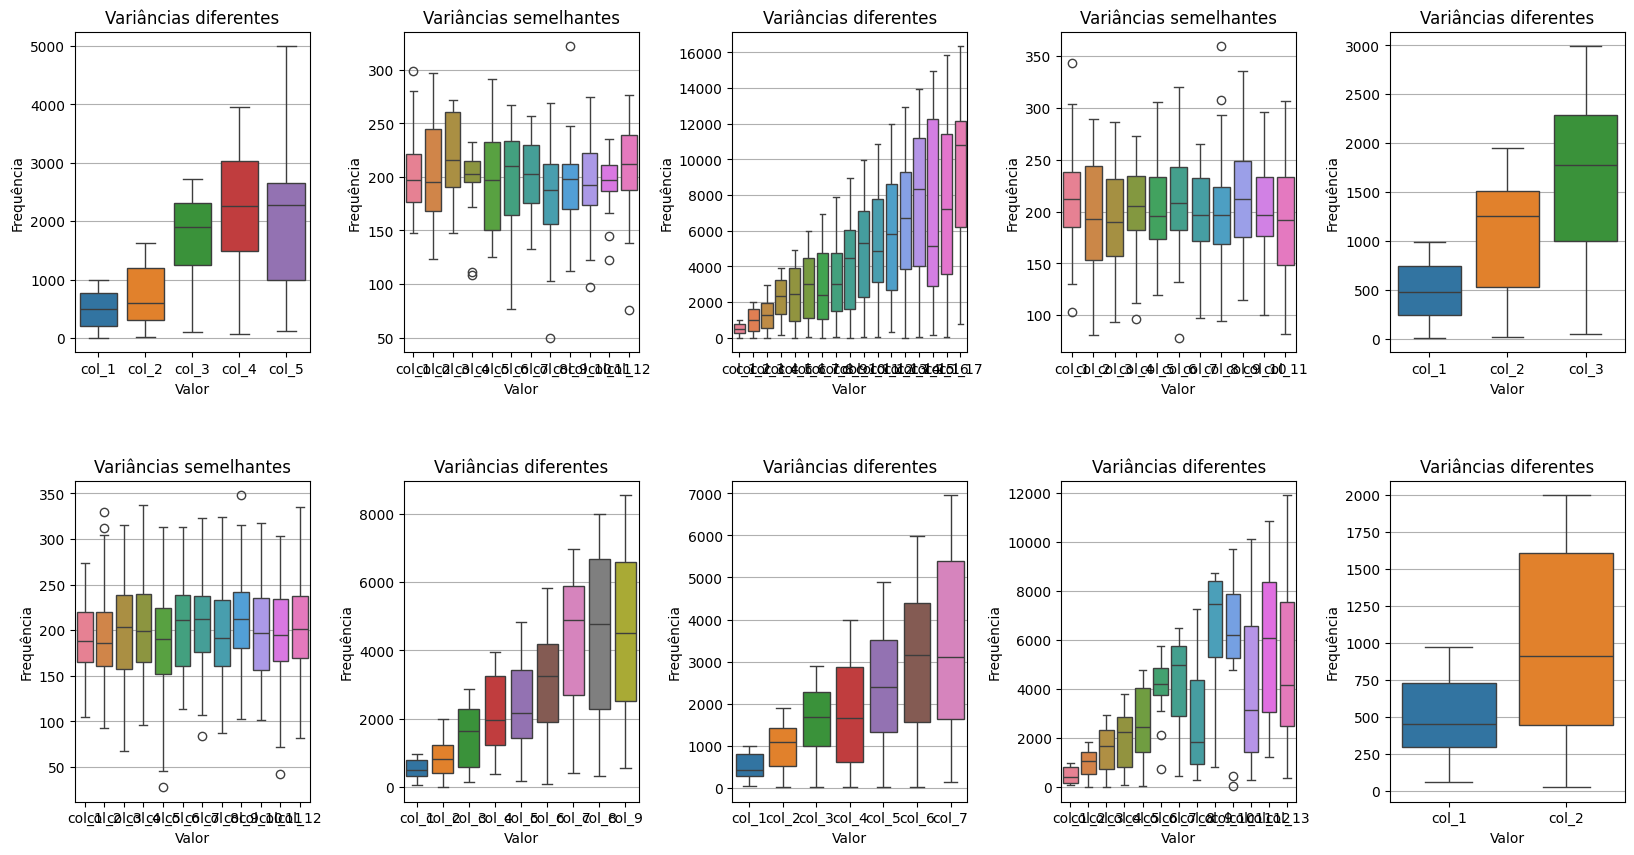

In [33]:
# 10 AMOSTRAS
linhas = []
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fns = [criaTabela, criaTabelaNormal]

for i in range(2):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(5):
        k = random.randint(2, 19)
        n = random.randint(2, 100)

        tabela = random.choice(fns)(k, n)

        N = n*k

        var = []
        for _i in range(1, len(tabela.columns)+1):
            var.append(np.var(tabela[f'col_{_i}']))

        dp = []
        for _i in range(1, len(tabela.columns)+1):
            dp.append(np.std(tabela[f'col_{_i}']))

        varianciap = ((n-1)*(sum(var))) / (N-k)

        logvarianciap = math.log(varianciap)

        logs = []
        for _i in range(k):
            logs.append(math.log(var[_i]))

        q = ((N-k) * logvarianciap) - ((n-1) * (sum(logs)))

        c = 1 + ((1 / (3 * (k - 1))) * ((k / (n - 1)) - (1 / ((n*k)-k))))

        b = (q / c)

        b_critico = bartlett_critico(k-1)

        if b <= b_critico:
            is_accepted_child.append(True)
        else:
            is_accepted_child.append(False)

        # Testando com a biblioteca padrão
        '''
        for _i in range(1, len(tabela.columns)+1):
            tabela[f'col_{_i}'] = treat_values(tabela[f'col_{_i}'])
        '''
        
        colunas = [tabela[f'col_{_i}'] for _i in range(1, len(tabela.columns)+1)]

        stat, p = scipy.stats.bartlett(*colunas)
        alpha = 0.05

        if p < alpha:
            is_accepted_test_child.append(False)
        else:
            is_accepted_test_child.append(True)

        if(is_accepted_child[j]):
            axs[i][j].set_title('Variâncias semelhantes')
        else:
            axs[i][j].set_title('Variâncias diferentes')

        axs[i][j].set_xlabel('Valor')
        axs[i][j].set_ylabel('Frequência')
        axs[i][j].grid(True)
        sns.boxplot(tabela, ax=axs[i][j])

        
        linha = {}
        linha['k'] = k
        linha['n'] = n
        linha['N'] = N
        linha['varianciap'] = varianciap
        linha['b'] = b
        linha['b_critico'] = b_critico
        linha['is_accepted'] = is_accepted_child[j]
        linha['is_accepted_test'] = is_accepted_test_child[j]
        linha['result'] = is_accepted_child[j] == is_accepted_test_child[j]
        linhas.append(linha)


    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)

rdf = pd.DataFrame(linhas)
plt.show()

In [34]:
rdf

,k,n,N,varianciap,b,b_critico,is_accepted,is_accepted_test,result
0,5,24,120,8.246975e+05,56.421648,9.488,False,False,True
1,12,17,204,2.020981e+03,12.249869,19.675,True,True,True
2,17,64,1088,8.653259e+06,721.486815,26.296,False,False,True
3,11,50,550,2.266955e+03,8.483509,18.307,True,True,True
4,3,91,273,3.509141e+05,83.452978,5.991,False,False,True
5,12,80,960,2.476528e+03,11.943328,19.675,True,True,True
6,9,35,315,2.527122e+06,192.021032,15.507,False,False,True
7,7,79,553,1.681574e+06,325.615431,12.592,False,False,True
8,13,14,182,4.789887e+06,106.946905,21.026,False,False,True
9,2,41,82,2.198340e+05,23.782160,3.841,False,False,True


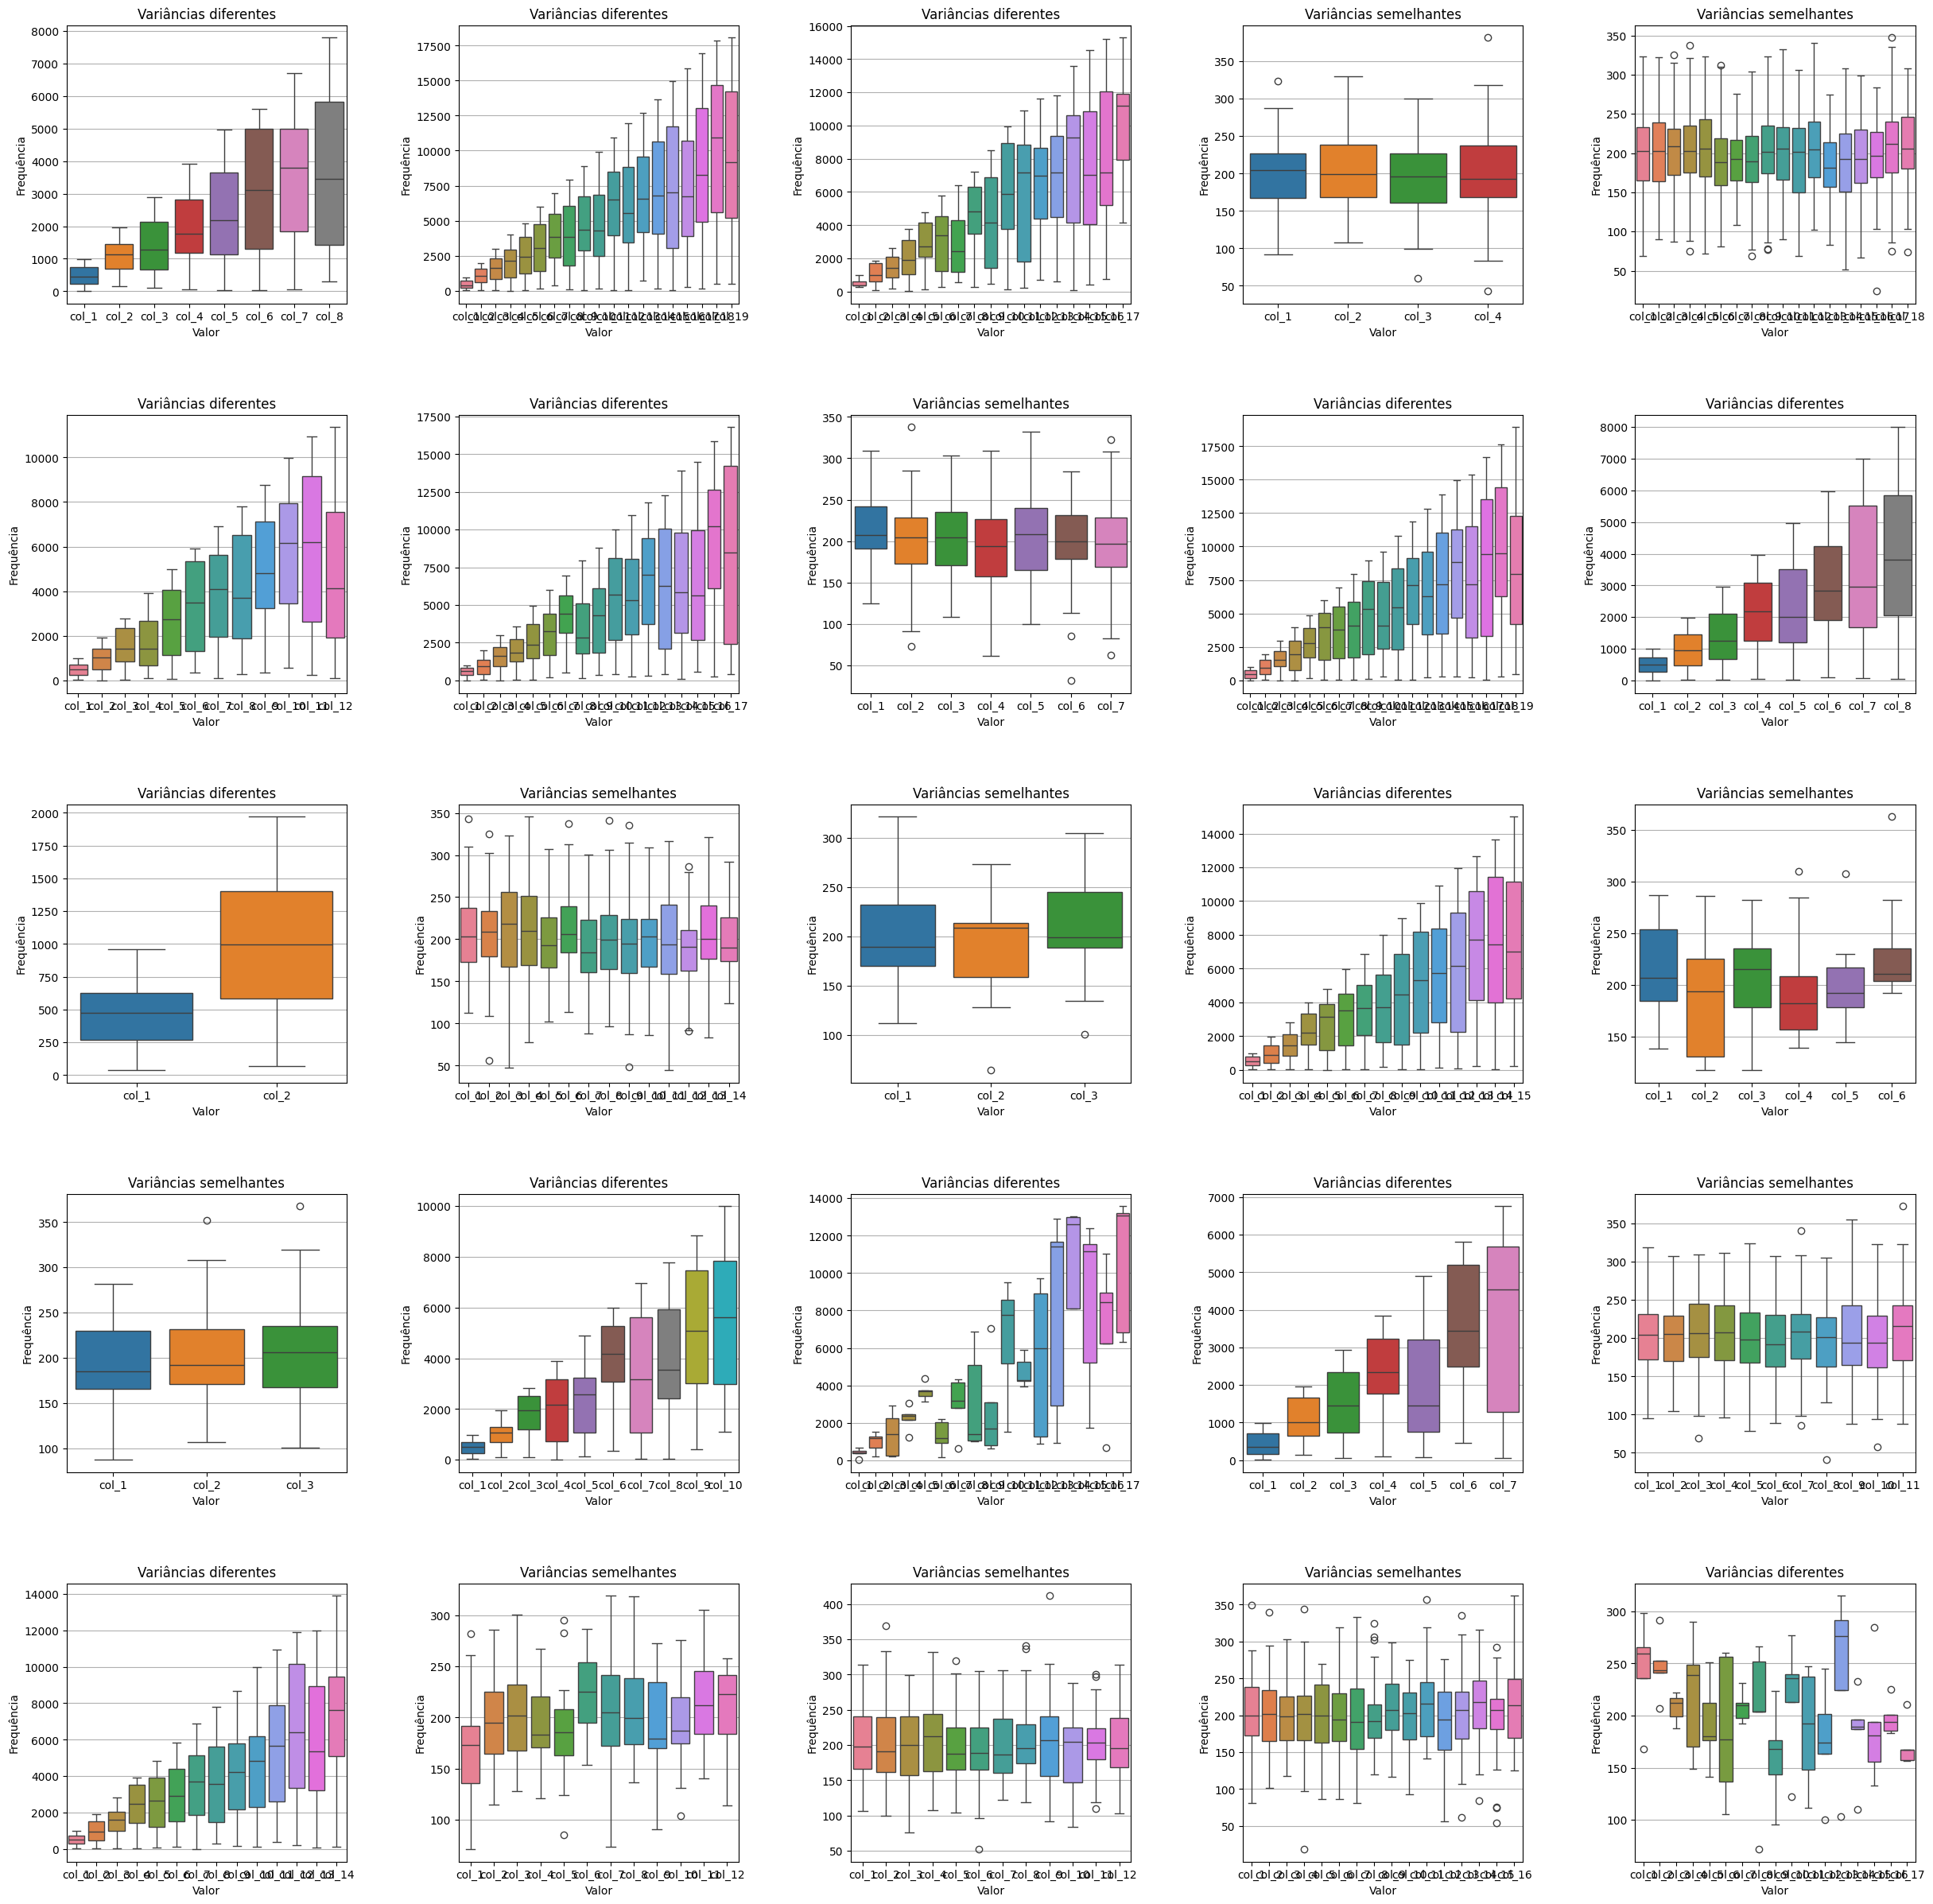

In [15]:
# 25 AMOSTRAS
linhas = []
is_accepted = []
is_accepted_test = []

fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(30, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

fns = [criaTabela, criaTabelaNormal]

for i in range(5):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(5):
        k = random.randint(2, 19)
        n = random.randint(2, 100)

        tabela = random.choice(fns)(k, n)

        N = n*k

        var = []
        for _i in range(1, len(tabela.columns)+1):
            var.append(np.var(tabela[f'col_{_i}']))

        dp = []
        for _i in range(1, len(tabela.columns)+1):
            dp.append(np.std(tabela[f'col_{_i}']))

        varianciap = ((n-1)*(sum(var))) / (N-k)

        logvarianciap = math.log(varianciap)

        logs = []
        for _i in range(k):
            logs.append(math.log(var[_i]))

        q = ((N-k) * logvarianciap) - ((n-1) * (sum(logs)))

        c = 1 + ((1 / (3 * (k - 1))) * ((k / (n - 1)) - (1 / ((n*k)-k))))

        b = (q / c)

        b_critico = bartlett_critico(k-1)

        if b <= b_critico:
            is_accepted_child.append(True)
        else:
            is_accepted_child.append(False)

        # Testando com a biblioteca padrão
        '''
        for _i in range(1, len(tabela.columns)+1):
            tabela[f'col_{_i}'] = treat_values(tabela[f'col_{_i}'])
        '''
        
        colunas = [tabela[f'col_{_i}'] for _i in range(1, len(tabela.columns)+1)]

        stat, p = scipy.stats.bartlett(*colunas)
        alpha = 0.05

        if p < alpha:
            is_accepted_test_child.append(False)
        else:
            is_accepted_test_child.append(True)

        if(is_accepted_child[j]):
            axs[i][j].set_title('Variâncias semelhantes')
        else:
            axs[i][j].set_title('Variâncias diferentes')

        axs[i][j].set_xlabel('Valor')
        axs[i][j].set_ylabel('Frequência')
        axs[i][j].grid(True)
        sns.boxplot(tabela, ax=axs[i][j])

        
        linha = {}
        linha['k'] = k
        linha['n'] = n
        linha['N'] = N
        linha['varianciap'] = varianciap
        linha['b'] = b
        linha['b_critico'] = b_critico
        linha['is_accepted'] = is_accepted_child[j]
        linha['is_accepted_test'] = is_accepted_test_child[j]
        linha['result'] = is_accepted_child[j] == is_accepted_test_child[j]
        linhas.append(linha)


    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)

rdf = pd.DataFrame(linhas)
plt.show()

In [16]:
rdf

,k,n,N,varianciap,b,b_critico,is_accepted,is_accepted_test,result
0,8,61,488,2.093058e+06,305.462880,14.067,False,False,True
0,19,82,1558,1.023376e+07,1114.866203,28.869,False,False,True
0,17,11,187,8.523200e+06,118.525314,26.296,False,False,True
0,4,89,356,2.396365e+03,5.728403,7.815,True,True,True
0,18,80,1440,2.484832e+03,23.092774,27.587,True,True,True
0,12,47,564,4.578296e+06,374.255049,19.675,False,False,True
0,17,42,714,8.966095e+06,535.948317,26.296,False,False,True
0,7,81,567,2.261004e+03,9.577910,12.592,True,True,True
0,19,74,1406,1.062665e+07,972.535622,28.869,False,False,True
0,8,92,736,2.151050e+06,449.452659,14.067,False,False,True


In [29]:
linhas = []
is_accepted = []
is_accepted_test = []

fns = [criaTabela, criaTabelaNormal]

for i in range(10):
    is_accepted_child = []
    is_accepted_test_child = []
    for j in range(500):
        k = random.randint(2, 19)
        n = random.randint(2, 100)

        tabela = random.choice(fns)(k, n)

        N = n*k

        var = []
        for _i in range(1, len(tabela.columns)+1):
            var.append(np.var(tabela[f'col_{_i}']))

        dp = []
        for _i in range(1, len(tabela.columns)+1):
            dp.append(np.std(tabela[f'col_{_i}']))

        varianciap = ((n-1)*(sum(var))) / (N-k)

        logvarianciap = math.log(varianciap)

        logs = []
        for _i in range(k):
            logs.append(math.log(var[_i]))

        q = ((N-k) * logvarianciap) - ((n-1) * (sum(logs)))

        c = 1 + ((1 / (3 * (k - 1))) * ((k / (n - 1)) - (1 / ((n*k)-k))))

        b = (q / c)

        b_critico = bartlett_critico(k-1)

        if b <= b_critico:
            is_accepted_child.append(True)
        else:
            is_accepted_child.append(False)

        # Testando com a biblioteca padrão
        '''
        for _i in range(1, len(tabela.columns)+1):
            tabela[f'col_{_i}'] = treat_values(tabela[f'col_{_i}'])
        '''
        
        colunas = [tabela[f'col_{_i}'] for _i in range(1, len(tabela.columns)+1)]

        stat, p = scipy.stats.bartlett(*colunas)
        alpha = 0.05

        if p < alpha:
            is_accepted_test_child.append(False)
        else:
            is_accepted_test_child.append(True)

        
        linha = {}
        linha['k'] = k
        linha['n'] = n
        linha['N'] = N
        linha['varianciap'] = varianciap
        linha['b'] = b
        linha['b_critico'] = b_critico
        linha['is_accepted'] = is_accepted_child[j]
        linha['is_accepted_test'] = is_accepted_test_child[j]
        linha['result'] = is_accepted_child[j] == is_accepted_test_child[j]
        linhas.append(linha)


    is_accepted.append(is_accepted_child)
    is_accepted_test.append(is_accepted_test_child)

rdf = pd.DataFrame(linhas)
plt.show()

In [26]:
rdf.reset_index(drop=True, inplace=True)
print('Quantidade de amostras que têm variâncias significativamente diferentes (rejeita a hipótese nula): {} de {} ({}%)'.format(len(rdf[rdf['is_accepted_test'] == False]), len(rdf), len(rdf[rdf['is_accepted_test'] == False]) / len(rdf) * 100))
rdf[rdf['is_accepted_test'] == False]

Quantidade de amostras que têm variâncias significativamente diferentes (rejeita a hipótese nula): 519 de 1000 (51.9%)


,k,n,N,varianciap,b,b_critico,is_accepted,is_accepted_test,result
1,16,30,480,7.458475e+06,319.270567,24.996,False,False,True
2,10,94,940,3.199288e+06,586.097369,16.919,False,False,True
4,2,80,160,2.122722e+05,31.778488,3.841,False,False,True
5,8,99,792,2.250829e+06,473.808822,14.067,False,False,True
6,6,88,528,1.194614e+06,273.202319,11.071,False,False,True
...,...,...,...,...,...,...,...,...,...
992,13,58,754,5.391626e+06,514.763148,21.026,False,False,True
994,14,49,686,5.404879e+06,443.460858,22.362,False,False,True
995,4,17,68,6.915845e+05,35.131670,7.815,False,False,True
996,9,39,351,2.395507e+06,187.116040,15.507,False,False,True


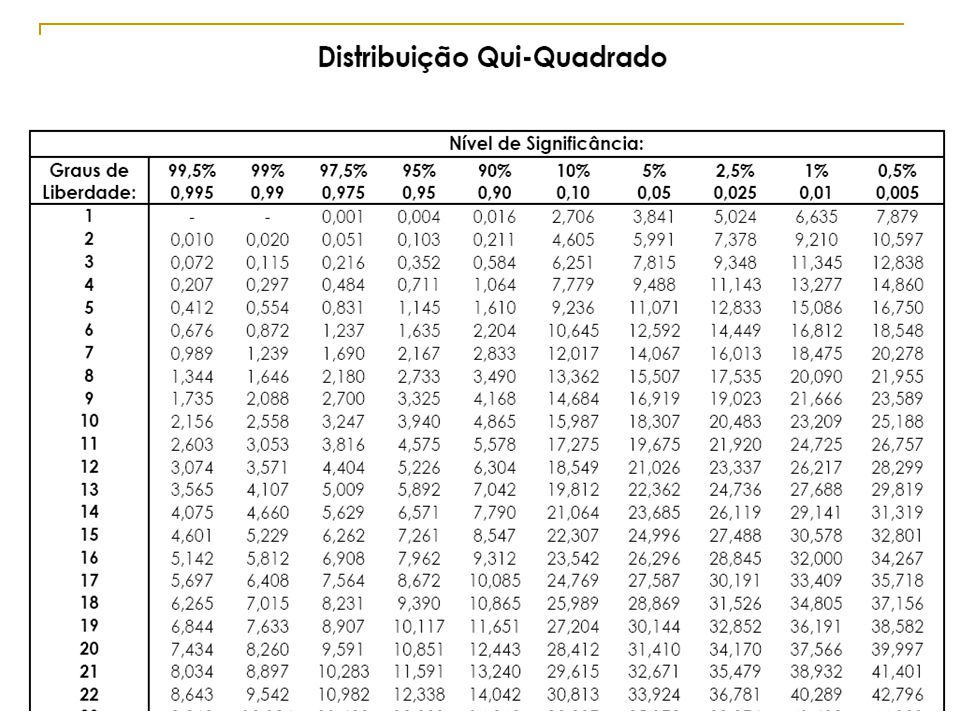